# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    if np.prod(arr) == 0:                        #с помощью prod проверяем, что в массиве есть ноль                     
        return np.max(x[1:][(x==0)[:-1]])        #с помощью срезов оставляем только числа после нуля                      
                                                 #стоящие после нуля и возвращаем max                                         
    return None                                  #если в массиве нет нуля возвращаем None
  
x = np.random.randint(5, size=10)                #генерируем массив из случайных целых чисел
print(f'array: {x} \nresult: {max_element(x)}')

array: [0 3 0 4 2 0 0 0 4 4] 
result: 4


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    #функция where возвращает минимальный индекс расстояния между элементом матрицы и заданным числом
    indices = np.where(abs(X - v) == abs(X - v).min())                    
    return X[indices][0]

X = np.random.randint(10, size=10).reshape((2, 5))
#генерируем случайное вещественное число и округляем до десятых
v = round(np.random.uniform(5), 1)

print(f'matrix X:\n{X}\nnearest value for value {v}: {nearest_value(X,v)}')

matrix X:
[[2 0 9 6 1]
 [5 0 8 0 6]]
nearest value for value 4.5: 5


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    mn = np.mean(X, axis = 0)          #считаем выборочное среднее с помощью mean
    sd = np.std(X, axis = 0)           #считаем стандартное отклонение с помощью std
    sd[sd == 0] = 1                    #проверяем, что стандартное отклонение не равно нулю
    A = (X - mn) / sd
    return A

X = np.random.randint(100, size=20).reshape((4, 5))
print(f'matrix X:\n{X}\nscaling of matrix X:\n{scale(X)}')


matrix X:
[[92 82 80 21 12]
 [91 11  1  5 99]
 [50 10 79 91 54]
 [17 56 75  5 68]]
scaling of matrix X:
[[ 0.94366789  1.37790564  0.63633379 -0.2673406  -1.47877017]
 [ 0.91167915 -0.9376281  -1.72933066 -0.71759845  1.30291642]
 [-0.39985927 -0.97024125  0.60638867  1.7025375  -0.13588699]
 [-1.45548776  0.52996371  0.4866082  -0.71759845  0.31174074]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    det = round(np.linalg.det(X))                      
    trace = np.trace(X)
    vmax = np.max(X)
    vmin = np.min(X)
    frob = np.linalg.norm(X, ord = 'fro')
    eig = np.linalg.eig(X)
    inver = np.linalg.inv(X)
    return (det, trace, vmax, vmin, frob, eig, inver)

X = np.random.normal(10, size=9).reshape((3, 3))
det, trace, vmax, vmin, frob, eig, inver = get_stats(X)

print(f'matrix X:\n{X}\n\ndeterminant:{det}\ntrace:{trace}\nmax value:{vmax}\n\
min value:{vmin}\nFrobenius norm:{frob}\neigenvalues:\n{eig}\ninverse matrix:\n{inver}')

matrix X:
[[ 8.86721516  9.31092804 10.49984671]
 [ 9.15219817  9.64585587 10.88806679]
 [10.96586627 10.78190123  9.06773755]]

determinant:-1
trace:27.580808581976562
max value:10.965866272964709
min value:8.867215156677702
Frobenius norm:29.826941065136158
eigenvalues:
(array([ 2.97431643e+01,  1.40522507e-02, -2.17640799e+00]), array([[-0.55753472, -0.63026596, -0.40496656],
       [-0.57716419,  0.76272964, -0.42976003],
       [-0.59668797, -0.14494245,  0.80703681]]))
inverse matrix:
[[ 32.90060658 -31.63779626  -0.10773216]
 [-40.02356206  38.18436893   0.49486514]
 [  7.80199476  -7.14227235  -0.34784979]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
from scipy.stats import norm
vmax = []

for exp_num in range(100):
    matrix_1 = np.random.normal(0, 1, (10, 10))
    matrix_2 = np.random.normal(0, 1, (10, 10))
    multiply_resul = np.matmul(matrix_1, matrix_2)   #перемножаем матрицы
    vmax.append(np.max(multiply_resul))
    
print(f'mean: {np.mean(vmax)}')

mean: 8.214199324201243


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [7]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
codes = {'A' : 'carrier', 'B' : 'weather', 'C' : 'NAS', 'D' : 'security'}   #создаем словарь для расшифровки причины задержки

df = pd.read_csv('2008.csv')

#группируем по коду отмены, считаем количество по остальным столбцам, сортируем от большего кол-ва отмен к меньшему  
df_loc = df.groupby(by='CancellationCode').count().sort_values(by='Cancelled', ascending=False).reset_index()
cause = df_loc.iloc[0]['CancellationCode']
count = df_loc.iloc[0]['Cancelled']

print(f'The most common reason for flight cancellations: {codes.get(cause)}. Count of cancelled flight - {count}.')

The most common reason for flight cancellations: carrier. Count of cancelled flight - 563.


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
df_loc = df.sort_values(by='Distance', ascending=False) #cортируем по distance от большего к меньшему
max_dist = df_loc.iloc[0]['Distance']                   #присваиваем max_dist наибольшее distance

df_loc = df.sort_values(by='Distance', ascending=True)  #cортируем по distance от меньшего к большему
min_dist = df_loc.iloc[0]['Distance']                   #присваиваем min_dist наименьшее distance

mean_dist = df['Distance'].mean(axis=0)                 #считаем среднее расстояние

print(f'min dist: {min_dist}\nmax dist: {max_dist}\nmean dist: {mean_dist}')

min dist: 31
max dist: 4962
mean dist: 724.5082571428571


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [10]:
df_loc = df.loc[df['Distance'] == min_dist] 
df_loc = df_loc[['FlightNum', 'DayofMonth', 'Distance']].drop_duplicates()
df_loc 

#определяем, что рейсы с минимальной дистанцией - 64 и 65

,FlightNum,DayofMonth,Distance
1116,65,30,31
6958,65,26,31
17349,64,18,31
27534,64,11,31
46082,65,9,31
48112,64,28,31


In [11]:
#находим расстояние, которое эти рейсы пролетели в другие дни
df_loc = df.loc[(df['Distance'] != min_dist) & ((df['FlightNum'] == 64) | (df['FlightNum'] == 65))]
df_loc = df_loc.filter(items=['Distance', 'FlightNum', 'DayofMonth'])
df_loc

,Distance,FlightNum,DayofMonth
501,533,64,20
1389,680,64,13
1517,680,65,10
2619,2381,64,23
3869,82,64,1
...,...,...,...
66529,82,65,21
67172,533,64,22
68264,386,65,7
68338,2454,65,3


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [12]:
#группируем по названию аэропорта и сортируем по количеству рейсов из каждого аэропорта
df_loc = df.groupby(by='Origin').count().sort_values(by='FlightNum', ascending=False).reset_index()
airport = df_loc.iloc[0]['Origin']
airport

#ATL - аэропорт Атланты

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [13]:
df_loc = df.groupby(by='Origin').mean().sort_values(by='AirTime', ascending=False).reset_index()
airport = df_loc.iloc[0]['Origin']
airport

#SJU - аэропорт каролины

'SJU'

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [14]:
df_loc = df.filter(items=['Origin', 'DepDelay', 'FlightNum'])
df_loc = df_loc[df_loc.DepDelay > 0]                                  #оставляем DepDelay больше нуля
   
df_loc = df_loc.groupby(by='Origin').count().reset_index()            #группируем по аэропортам
df_loc = df_loc[df_loc.FlightNum >= 1000]                             #оставляем аэропорты с кол-вом рейсов не меньше 1000
df_loc['CountDel'] = df_loc['DepDelay'].sum()                         #находим общее число задержек
df_loc['Percent'] = (df_loc['DepDelay'] / df_loc['CountDel']) * 100   #доля задержек в аэропорту
df_loc = df_loc.sort_values(by='Percent', ascending=False)            #сортируем по убыванию
airport = df_loc.iloc[0]['Origin']
airport

'ATL'

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns

data = pd.read_csv("2008.csv")

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [16]:
def scale(X):                                       #фугкция масштабирования для target feature
    mn = np.mean(X, axis = 0)
    sd = np.std(X, axis = 0)
    A = (X - mn) / sd
    return A

data = data[data['DepDelay'].notna()]               #убираем DepDelay с nan и 0.
data = data[data['DepDelay'] != 0]
data_with_target = data
target_feature = np.array(data['DepDelay'])
target_feature = scale(target_feature)              #масштабируем target feature
data = data.drop('DepDelay', axis = 1)              #выкидываем DepDelay из матрицы объект-признак
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [17]:
target_feature

array([ 0.14497054,  0.14497054, -0.35439357, ...,  0.36691014,
       -0.13245397, -0.32665112])

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [18]:
def time_split(time):                 #функция разбивает число по часам и минутам
    minutes = time % 100
    hours = time // 100
    return (hours, minutes)

data['DepTime_Hour'], data['DepTime_Minute'] = time_split(data['DepTime'])
data['CRSDepTime_Hour'], data['CRSDepTime_Minute'] = time_split(data['CRSDepTime'])
data['ArrTime_Hour'], data['ArrTime_Minute'] = time_split(data['ArrTime'])
data['CRSArrTime_Hour'], data['CRSArrTime_Minute'] = time_split(data['CRSArrTime'])

data = data.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=1)
data

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

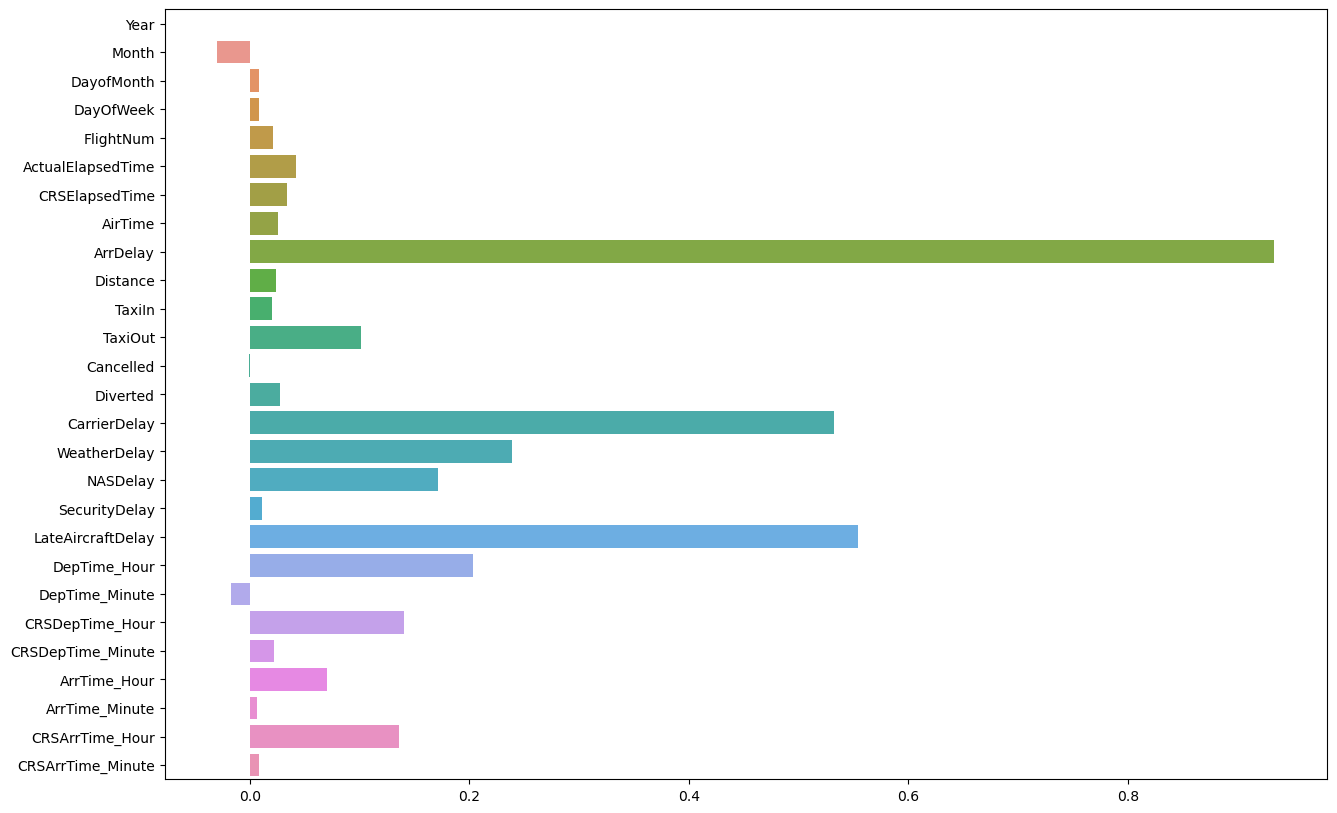

In [19]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

#находим корреляцию между DepDelay и другими числовыми значениями
correlations = data[numeric_features].corrwith(data_with_target['DepDelay']) 

plot = sns.barplot(y=numeric_features, x=correlations)
plot.figure.set_size_inches(15, 10)

In [20]:
data = data.drop(['CarrierDelay', 'WeatherDelay', 'ArrDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year'], axis=1)
data

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,CancellationCode,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,NaN,0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,NaN,0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,NaN,0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,NaN,0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,NaN,0,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,NaN,0,9.0,20.0,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,NaN,0,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,NaN,0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,NaN,0,19.0,6.0,19,0,22.0,0.0,21,39


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

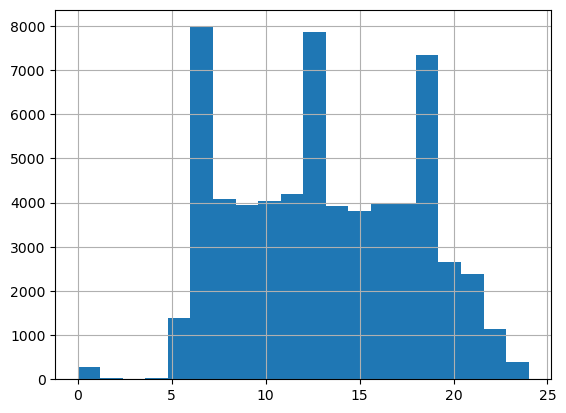

In [21]:
data['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

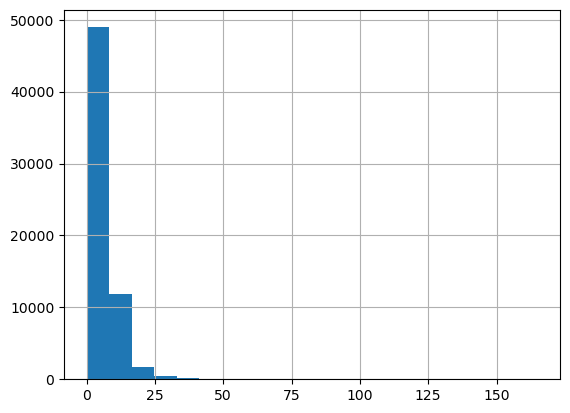

In [22]:
data['TaxiIn'].hist(bins=20)

<AxesSubplot:>

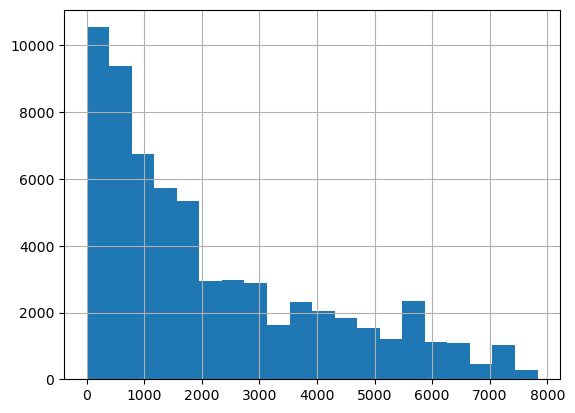

In [23]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [26]:
def transform_data(data):
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns #выбираем только столбцы с численными значениями
    data[numeric_features] = data[numeric_features].fillna(0)                   #заменяем пропуск на 0
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])       #применяем standard scaler
    
    categorical_features = data.select_dtypes(include=['object']).columns       #выбираем только столбцы с объектами
    data[categorical_features] = data[categorical_features].fillna('nan')       #заменяем пропуск на nan
    data = pd.get_dummies(data)                                                 #one-hot кодирвоание
    return data


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [27]:
data = transform_data(data)
data

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_nan
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,1
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,1
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,1
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,1
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,1
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,1
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,1
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,1


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [28]:
y = target_feature

X = data

#разбиваем выборку на обучающую и контрольную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [29]:
quantity = 1000

model = LinearRegression()

df_train, target_train = X_train[:quantity], y_train[:quantity] 
df_test, target_test = X_test, y_test

model.fit(df_train, target_train)

target_pred = model.predict(df_test)
target_train_pred = model.predict(df_train)

print(f'Test MSE = {mean_squared_error(target_test, target_pred)}')
print(f'Test R2 = {model.score(df_test, target_test)}\n')

print(f'Train MSE = {mean_squared_error(target_train, target_train_pred)}')
print(f'Train R2 = {model.score(df_train, target_train)}')


Test MSE = 5.648923021500831e+27
Test R2 = -5.486904082105539e+27

Train MSE = 0.4373757304825975
Train R2 = 0.4637907563431981


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [30]:
model = Lasso()

quantity = 1000
df_train, target_train = X_train[:quantity], y_train[:quantity] 
df_test, target_test = X_test, y_test

model.fit(df_train, target_train)

target_pred = model.predict(df_test)
target_train_pred = model.predict(df_train)

print(f'Lasso Test MSE = {mean_squared_error(target_test, target_pred)}')
print(f'Lasso Test R2 = {model.score(df_test, target_test)}\n')

print(f'Lasso Train MSE = {mean_squared_error(target_train, target_train_pred)}')
print(f'Lasso Train R2 = {model.score(df_train, target_train)}\n')

model = Ridge()

df_train, target_train = X_train[:quantity], y_train[:quantity] 
df_test, target_test = X_test, y_test

model.fit(df_train, target_train)

target_pred = model.predict(df_test)
target_train_pred = model.predict(df_train)

print(f'Ridge Test MSE = {mean_squared_error(target_test, target_pred)}')
print(f'Ridge Test R2 = {model.score(df_test, target_test)}\n')

print(f'Ridge Train MSE = {mean_squared_error(target_train, target_train_pred)}')
print(f'Ridge Train R2 = {model.score(df_train, target_train)}')

Lasso Test MSE = 1.0304603597287971
Lasso Test R2 = -0.0009053288075591137

Lasso Train MSE = 0.8156810716275859
Lasso Train R2 = 0.0

Ridge Test MSE = 1.0683142398061356
Ridge Test R2 = -0.03767350715400419

Ridge Train MSE = 0.4602300098908717
Ridge Train R2 = 0.43577211008152683


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?